In [1]:
import os
import subprocess

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage.color import rgb2hsv, rgba2rgb, hsv2rgb, rgb2gray, gray2rgb

In [2]:
# %matplotlib notebook
%matplotlib ipympl

In [3]:
directory = '../data/faces'
fps = [os.path.join(directory, root) for root in os.listdir(directory)]
fp = np.random.choice(fps)
root = fp.split('/')[-1].split('.')[0]
root

'Copy of IMG_2126'

In [4]:
fp

np.str_('../data/faces/Copy of IMG_2126.JPG')

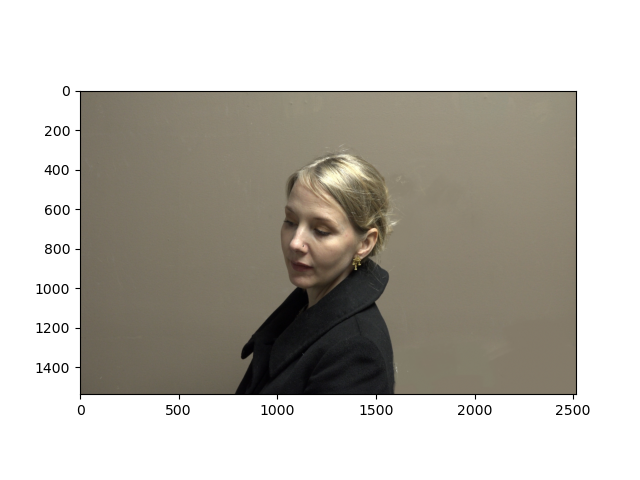

In [5]:
img = skimage.io.imread(fp)

if img.shape[2] == 4:
    img = rgba2rgb(img)
    
if np.max(img) > 1:
    img = img / 255.

hsv_img = rgb2hsv(img)
gray_img = rgb2gray(img)
plt.imshow(img)
plt.show()

In [6]:
pts = []
colors = []

In [7]:
def on_pick(event):
    x, y = event.xdata, event.ydata
    pts.append((x, y))
    
    ax1.scatter(x, y, s=2, color='red')
    ax3.scatter(x, y, s=2, color='#ab5252')
    
    r, g, b = img[int(y), int(x)]
    colors.append((r, g, b))
    ax5.axvline(gray_img[int(y), int(x)] * 256., -.5, 2.5, color=(r, g, b))
    
    h, s, v = hsv_img[int(y), int(x)]
    
    p = 0.01745329 * (h * 360)
    
    x, y = s * np.cos(p), s * np.sin(p)
    
    ax2.scatter(x, y, v, color=(r, g, b))
    ax4.scatter(x, y, color=(r, g, b))
    
    fig.canvas.draw()
    
def add_hues(ax):
    for i in range(0, 360, 5):
        h, s, v = i / 360., 1., 1.
        r, g, b = hsv2rgb(np.asarray([h, s, v]).reshape((1, 1, -1))).flatten()

        p = 0.01745329 * (h * 360)
        x, y = s * np.cos(p), s * np.sin(p)

        ax.scatter(x, y, color=(r, g, b))

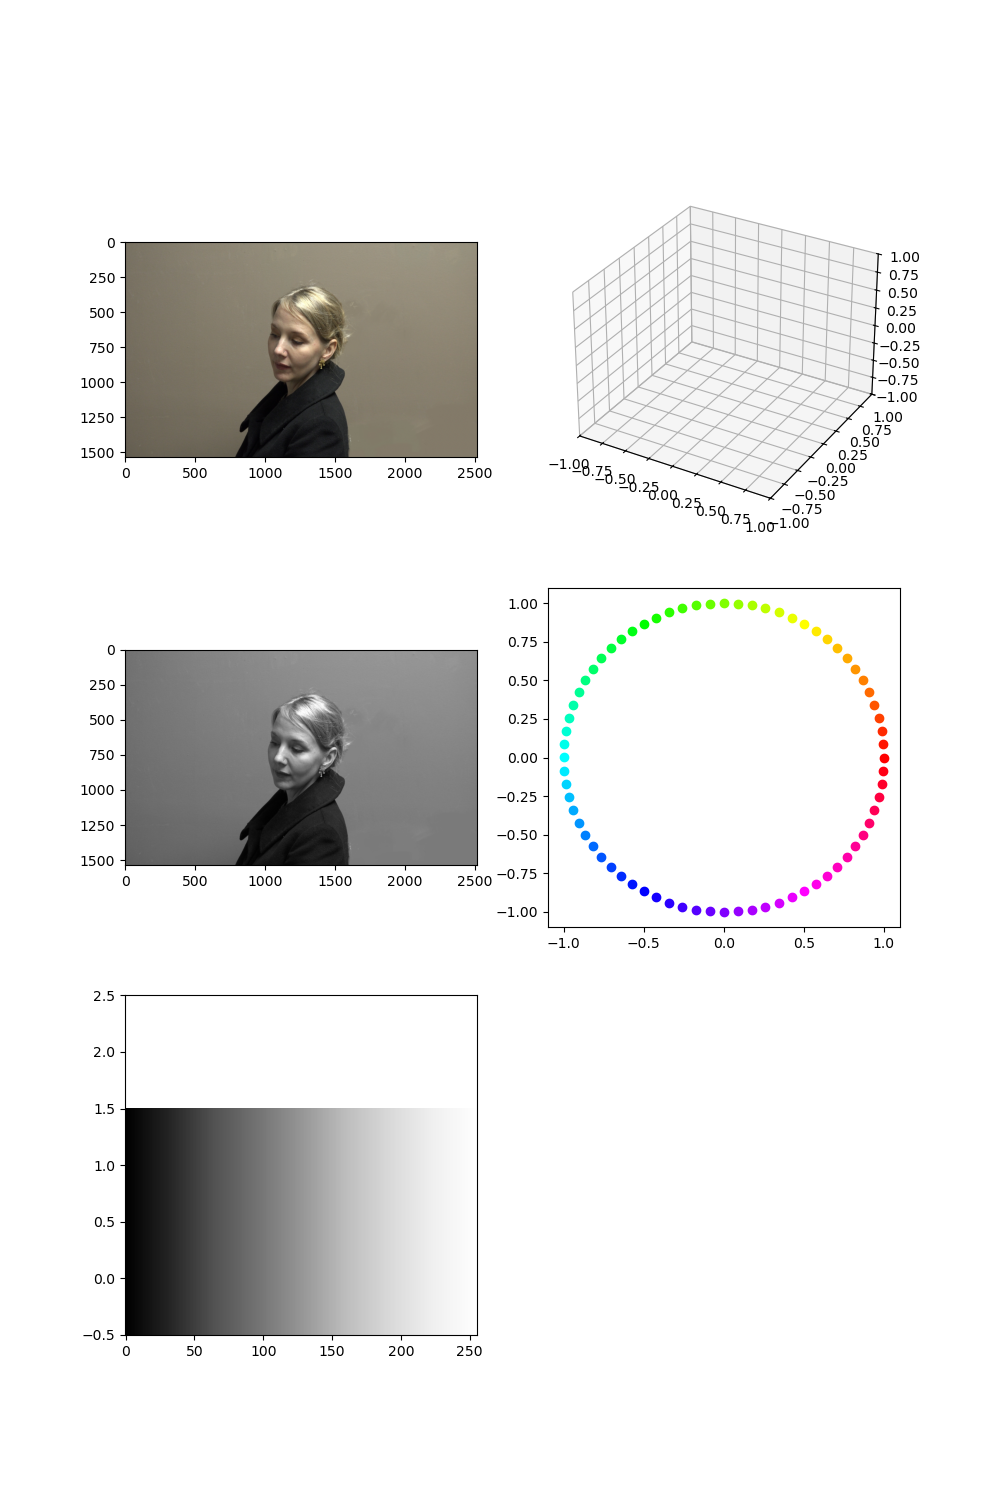

In [8]:
fig = plt.figure(figsize=(10, 15))
ax1 = fig.add_subplot(3, 2, 1)
im = ax1.imshow(img)

ax2 = fig.add_subplot(3, 2, 2, projection='3d')
ax2.set_xlim(-1., 1.)
ax2.set_ylim(-1., 1.)
ax2.set_zlim(-1., 1.)

ax3 = fig.add_subplot(3, 2, 3,)
im = ax3.imshow(gray2rgb(gray_img))

ax4 = fig.add_subplot(3, 2, 4)
ax4.set_xlim(-1.1, 1.1)
ax4.set_ylim(-1.1, 1.1)

ax5 = fig.add_subplot(3, 2, 5)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
ax5.set_ylim(-.5, 2.5)
ax5.imshow(gradient, aspect='auto', cmap='Greys_r')

add_hues(ax4)

fig.canvas.mpl_connect('button_press_event', on_pick)
plt.show()

In [11]:
from sklearn.neighbors import NearestNeighbors

In [12]:
c = colors[0]
nbrs = NearestNeighbors()
X = img.reshape((-1, 3))
nbrs.fit(X)
idxs = nbrs.radius_neighbors(X=[c], radius=.1)[1][0]
len(idxs)

178976

<IPython.core.display.Javascript object>


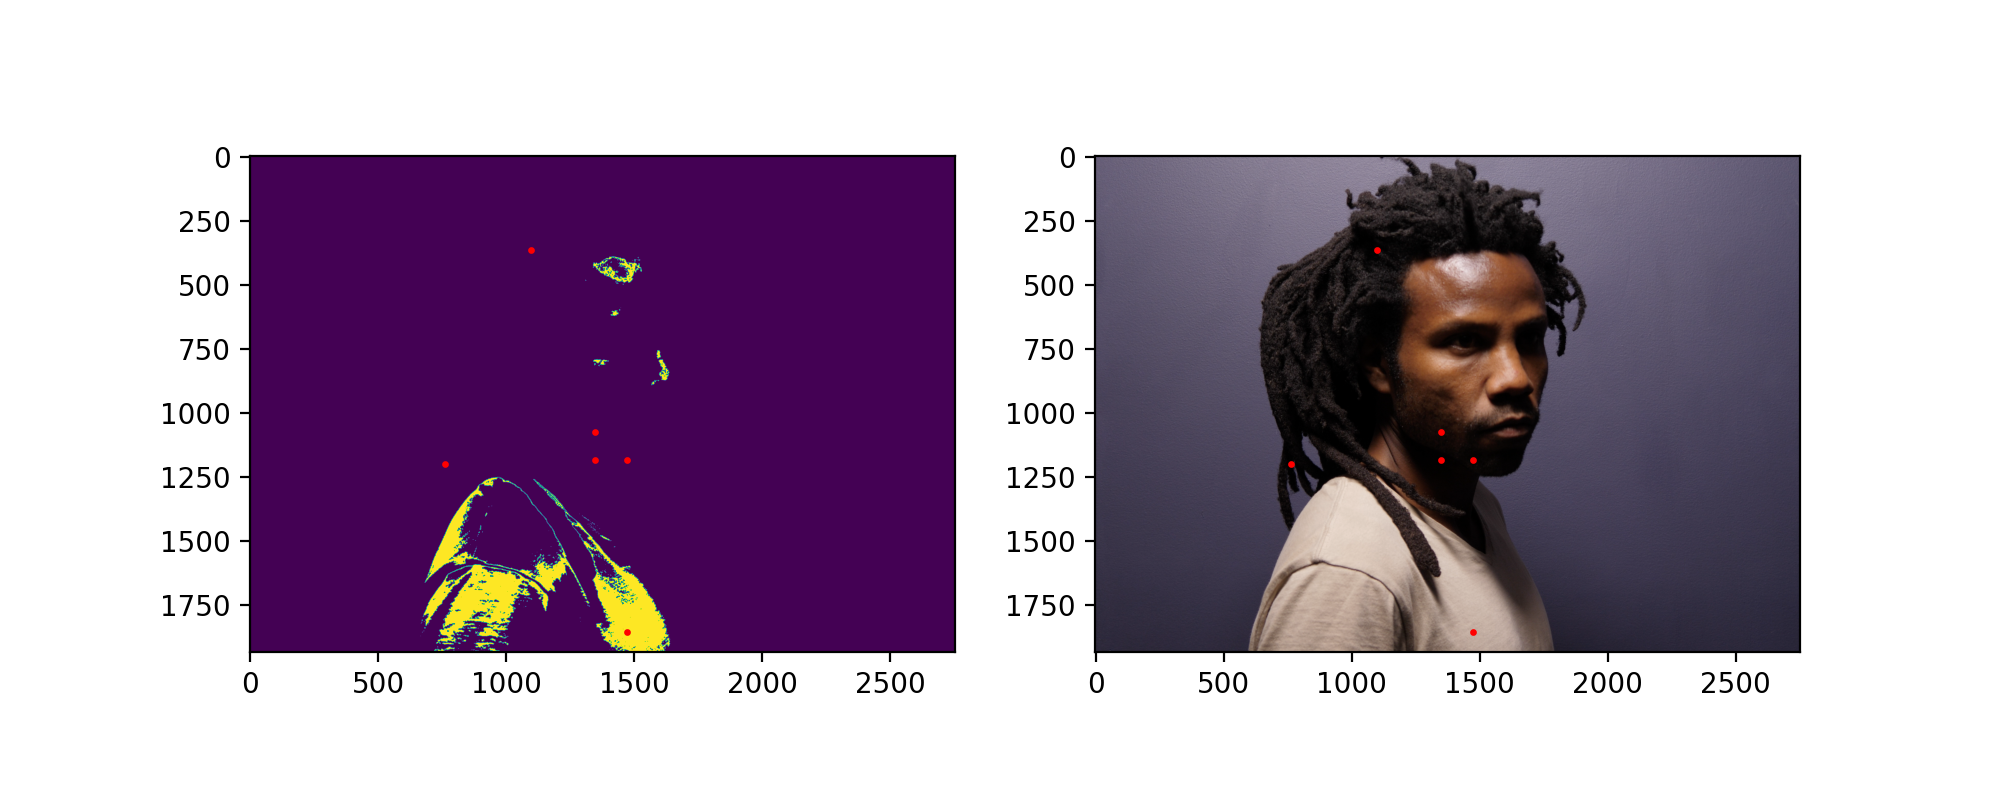

In [13]:
mask = np.zeros((X.shape[0],))
mask[idxs] = 1
mask = mask.reshape((img.shape[0], img.shape[1]))
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
axs[0].imshow(mask)
xs, ys = zip(*pts)
axs[0].scatter(xs, ys, color='red', s=2)

axs[1].imshow(img)
axs[1].scatter(xs, ys, color='red', s=2)